In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_data = pd.DataFrame()
for fmt in ['text', 'table', 'json_xml']:
    csv_file = f'code/output/similarity/{fmt}_similarity_results.csv'
    df = pd.read_csv(csv_file, dtype={'id1': str, 'id2': str, 'j_sim': float})
    all_data = pd.concat([all_data, df], ignore_index=True)

all_data_pattern = pd.DataFrame()
for fmt in ['table', 'json_xml']:
    csv_file = f'code/output/similarity/{fmt}_pattern_similarity_results.csv'
    df = pd.read_csv(csv_file, dtype={'id1': str, 'id2': str, 'j_sim': float})
    all_data_pattern = pd.concat([all_data_pattern, df], ignore_index=True)
    
acordar_content = pd.read_csv('code/output/similarity/rdf_similarity_results.csv', dtype={'id1': str, 'id2': str, 'j_sim': float})
acordar_pattern = pd.read_csv('code/output/similarity/rdf_pattern_similarity_results.csv', dtype={'id1': str, 'id2': str, 'j_sim': float})


In [3]:
def count_thresholds(df, thresholds):
    counts = []
    for threshold in thresholds:
        count = (df['j_sim'] > threshold).sum()
        counts.append(count)
    return counts

def compute_min_slope(thresholds, counts):
    slopes = np.gradient(counts, thresholds)  # 注意顺序：dy/dx
    min_slope_idx = np.argmin(slopes)        # 找到最大斜率的索引
    min_slope_threshold = thresholds[min_slope_idx]  # 对应的阈值
    min_slope_value = slopes[min_slope_idx]  # 最大斜率值

    return slopes, min_slope_idx, min_slope_threshold, min_slope_value

In [124]:

def plot_counts_and_slope(thresholds, counts, slopes, min_slope_threshold, min_slope_value, 
                          title=None, loc='best', bbox_to_anchor=(1, 1), save_path=None):
    fig, ax1 = plt.subplots(figsize=(5, 3.5))

    # 绘制 counts 曲线（左侧纵轴）
    ax1.plot(thresholds, counts, 'b-o', label='Number')
    ax1.set_xlabel('Jaccard Similarity Threshold')
    ax1.set_ylabel('Number of Similar Pairs')
    ax1.set_yscale('log')  # 关键修改：对数坐标
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True)

    # 创建右侧纵轴绘制斜率曲线
    ax2 = ax1.twinx()
    ax2.plot(thresholds, slopes, 'r--s', label='Slope')
    ax2.set_ylabel('Slope', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_yticks([])  # 隐藏刻度
    ax2.set_ylabel('')  # 隐藏标签

    # 标出最小斜率点
    ax2.scatter(min_slope_threshold, min_slope_value, color='k', s=100, 
                label=f'Min Slope at {min_slope_threshold:.2f}')

    # 合并图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc=loc, bbox_to_anchor=bbox_to_anchor) # 'lower left'

    if title:
        plt.title(title)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt


In [131]:
thresholds = [i/100 for i in range(45, 96, 1)]

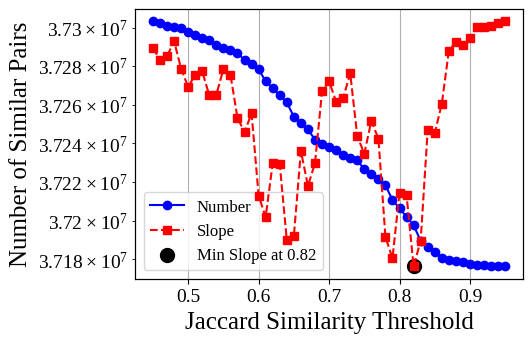

最小斜率出现在阈值 = 0.82, 斜率值 = -617050.000, 对应 counts = 37197528


In [134]:
plt.rcParams.update({
    'legend.fontsize': 12,    # 图例字体大小
})
counts = count_thresholds(all_data, thresholds)
slopes, min_slope_idx, min_slope_threshold, min_slope_value = compute_min_slope(thresholds, counts)
plot_counts_and_slope(thresholds, counts, slopes, min_slope_threshold, min_slope_value,
                      '', loc="lower left", bbox_to_anchor=(0, 0), # Threshold of Data Overlap in NTCIR-CoDaKG
                      save_path='code/data/cluster/ntcir/ntcir_data_overlap_threshold.pdf')
print(
    f"最小斜率出现在阈值 = {min_slope_threshold:.2f}, "
    f"斜率值 = {min_slope_value:.3f}, "
    f"对应 counts = {counts[min_slope_idx]}"  # 从 counts 中提取值
)

In [135]:
plt.rcParams.update({
    "font.family": "serif",          # 使用衬线字体
    "font.serif": ["Liberation Serif", "DejaVu Serif"],  # 替代字体
    'font.size': 14,          # 默认字体大小
    'axes.titlesize': 14,     # 标题字体大小
    'axes.labelsize': 18,     # x 和 y 轴标签字体大小
    'xtick.labelsize': 14,    # x 轴刻度字体大小
    'ytick.labelsize': 14,    # y 轴刻度字体大小
    'legend.fontsize': 13,    # 图例字体大小
})

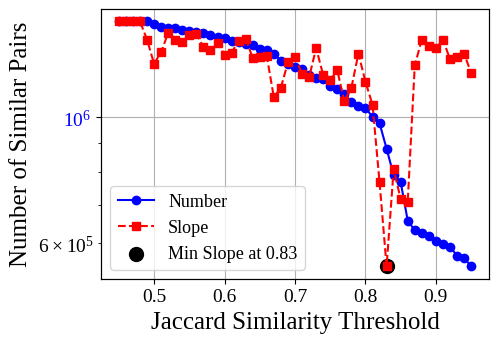

最小斜率出现在阈值 = 0.83, 斜率值 = -9250650.000, 对应 counts = 880547


In [136]:
counts = count_thresholds(all_data_pattern, thresholds)
slopes, min_slope_idx, min_slope_threshold, min_slope_value = compute_min_slope(thresholds, counts)
plot_counts_and_slope(thresholds, counts, slopes, min_slope_threshold, min_slope_value, 
                      '', loc="lower left", bbox_to_anchor=(0, 0), # Threshold of Schema Overlap in NTCIR-CoDaKG
                      save_path='code/data/cluster/ntcir/ntcir_schema_overlap_threshold.pdf')
print(
    f"最小斜率出现在阈值 = {min_slope_threshold:.2f}, "
    f"斜率值 = {min_slope_value:.3f}, "
    f"对应 counts = {counts[min_slope_idx]}"  # 从 counts 中提取值
)

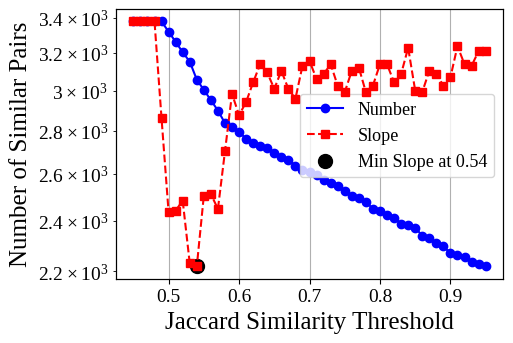

最小斜率出现在阈值 = 0.54, 斜率值 = -7450.000, 对应 counts = 3058


In [141]:
counts = count_thresholds(acordar_content, thresholds)
slopes, min_slope_idx, min_slope_threshold, min_slope_value = compute_min_slope(thresholds, counts)
plot_counts_and_slope(thresholds, counts, slopes, min_slope_threshold, min_slope_value, 
                      '',  loc="upper right", bbox_to_anchor=(1, 0.72), # Threshold of Data Overlap in ACORDAR-CoDaKG
                      save_path='code/data/cluster/acordar/acordar_data_overlap_threshold.pdf')
print(
    f"最小斜率出现在阈值 = {min_slope_threshold:.2f}, "
    f"斜率值 = {min_slope_value:.3f}, "
    f"对应 counts = {counts[min_slope_idx]}"  # 从 counts 中提取值
)

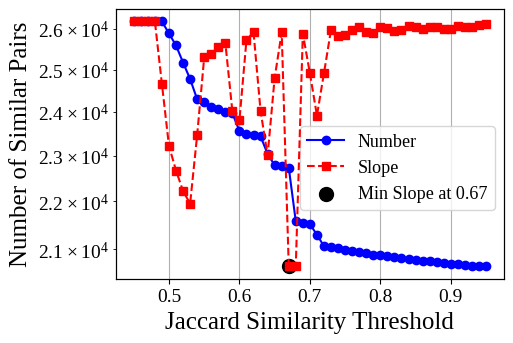

最小斜率出现在阈值 = 0.67, 斜率值 = -59250.000, 对应 counts = 22733


In [145]:
counts = count_thresholds(acordar_pattern, thresholds)
slopes, min_slope_idx, min_slope_threshold, min_slope_value = compute_min_slope(thresholds, counts)
plot_counts_and_slope(thresholds, counts, slopes, min_slope_threshold, min_slope_value, 
                      '', loc="upper right", bbox_to_anchor=(1, 0.6),
                      save_path='code/data/cluster/acordar/acordar_schema_overlap_threshold.pdf') # Threshold of Schema Overlap in ACORDAR-CoDaKG
print(
    f"最小斜率出现在阈值 = {min_slope_threshold:.2f}, "
    f"斜率值 = {min_slope_value:.3f}, "
    f"对应 counts = {counts[min_slope_idx]}"  # 从 counts 中提取值
)